In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dot product: 'np.dot()'
x = np.array([[1., 2., 3.], [4., 5., 6]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x, '\n')
print(y, '\n')

# two ways to do dot product in numpy with equivalent results
print(x.dot(y), '\n')
print(np.dot(x, y), '\n')

# dot product between a 1 dim and a 2 dim array creates a 1 dim array
print(np.dot(x, np.ones(3)), '\n')

# '@' or Python infix operator works on Numpy objects
print(x @ np.ones(3))

[[1. 2. 3.]
 [4. 5. 6.]] 

[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]] 

[[ 28.  64.]
 [ 67. 181.]] 

[[ 28.  64.]
 [ 67. 181.]] 

[ 6. 15.] 

[ 6. 15.]


In [2]:
# Matrix decompositions: 
# module: 'np.linalg'
# functions: 'inv()', 'qr()'
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)  # dot product of 'X' and 'X' transpose
print(mat, '\n')
print(inv(mat), '\n') # Inverse of square matrix 'mat'

[[ 2.18832417  0.250808    1.37799063  0.55863703 -2.06231498]
 [ 0.250808    3.90751743 -1.44550655  1.61174893 -0.94618984]
 [ 1.37799063 -1.44550655  3.57773888 -0.69685354 -1.19150996]
 [ 0.55863703  1.61174893 -0.69685354  1.90831472 -3.39476418]
 [-2.06231498 -0.94618984 -1.19150996 -3.39476418 10.93414427]] 

[[ 0.79580539 -0.06679177 -0.39234744 -0.31081318  0.0050649 ]
 [-0.06679177  0.56491557  0.00725479 -0.86882522 -0.23266941]
 [-0.39234744  0.00725479  0.66724303  0.78448135  0.2428975 ]
 [-0.31081318 -0.86882522  0.78448135  3.46071226  1.02613893]
 [ 0.0050649  -0.23266941  0.2428975   1.02613893  0.41733586]] 



Common np.linalg functions
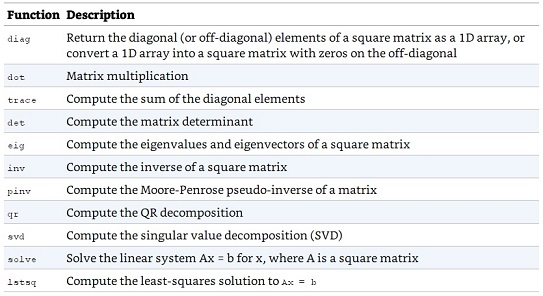

In [3]:
# Random & Pseudorandom numbers

# Numpy's random number generation is much faster than Python's generator
from random import normalvariate
N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size = N)

2.55 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
75.5 ms ± 7.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
# make psuedorandom by using a seed '.seed()'
np.random.seed(1234)              # creates a global seed
rng = np.random.RandomState(1234) # creates a local seed
print(rng.randn(10), '\n')        # generate 10 seeded random numbers



[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495] 



Common Numpy.random functions
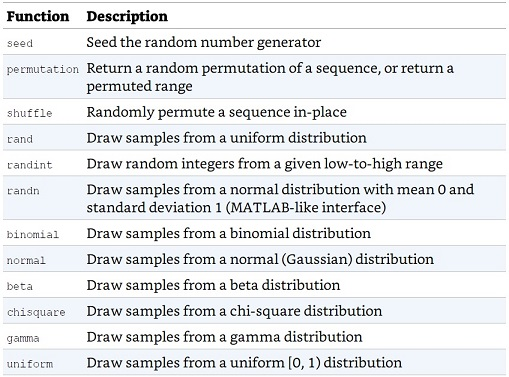

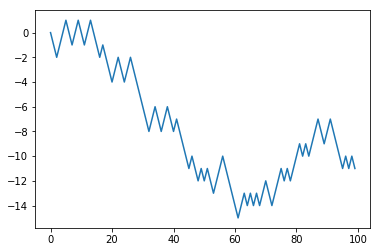

In [5]:
# random example using Random Walks
# random walk starting at 0 with steps of 1 and -1 with equal probability
import random

# Python implementation
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100])
plt.show()

-9
60


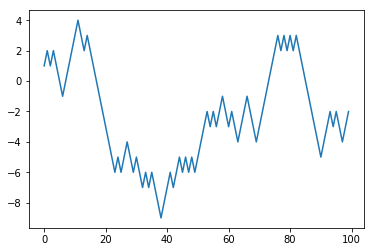

297 steps


In [6]:
# Numpy implementation
# Random Walk is the cumulative sum of the random steps

nsteps = 1000
# create matrix of values (0, 1)
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1) # Convert from (0, 1) to (-1, 1)
walk = steps.cumsum()              # Create a cumulative sum array
print(walk.min())                  # Print smallest value in the array
print(walk.max())                  # Print largest value in the array

plt.plot(walk[:100])
plt.show()                         # Plot the walk

# find 1st time the walk exceeded 10 steps from origin in either direction
# use np.abs() and .argmax() functions
print((np.abs(walk) >= 10).argmax(), "steps")

In [7]:
# Computing Many Random Walks
# Using arrays, Numpy can compute may walks at once

# Compute 5000 walks of 1000 steps
nwalks = 5000
nsteps = 1000
# Create a two dimensional array of (nwalks, nsteps)
draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # values = (0, 1)
steps = np.where(draws > 0, 1, -1) # convert values to (-1, 1)
walks = steps.cumsum(1) # Create cumulative sum array based on steps column

print(walks, '\n')
print(walks.min())                  # Print smallest value in the array
print(walks.max(), '\n')            # Print largest value in the array

# Compute average minimum crossing time to 30 or -30
# We'll have to find the number of walks that didn't reach 30 or -30
# create binary array using 'any()' where reaches 30 = 'True' else 'False'
hits30 = (np.abs(walks) >= 30).any(1) # based on column in 2 dim array
print(hits30)                         # print boolean array
print(hits30.sum(),'\n')              # Number of walks that reached 30

# Use boolean array 'hits30' to create an array grabbing rows from 'walks'
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times) # crossing_times is a 1 dimensional array

# Compute average minimum crossing time
print(crossing_times.mean())

# Additional work: Try other distributions other than flip of a coin
# hint: use a different number generation function such as '.normal()'
steps = np.random.normal(loc = 0, scale = 0.25, size = (nwalks, nsteps))

[[  1   2   3 ...  46  47  46]
 [  1   0   1 ...  40  41  42]
 [  1   2   3 ... -26 -27 -28]
 ...
 [  1   0   1 ...  64  65  66]
 [  1   2   1 ...   2   1   0]
 [ -1  -2  -3 ...  32  33  34]] 

-128
122 

[ True  True  True ...  True False  True]
3368 

[133 395 343 ... 409 297 747]
509.99762470308787
